In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('Earthquakes_database.csv')

In [31]:
def parse_datetime(x):
    return pd.to_datetime(x, errors='coerce')

In [32]:
# 1. Data Cleaning
df['DateTime'] = df['Date'] + ' ' + df['Time']
df['DateTime'] = df['DateTime'].apply(parse_datetime)

In [33]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [34]:
# 2. Categorize Magnitude into categories
bins = [0, 5, 6, 10]
labels = ['Low', 'Moderate', 'High']
df['Magnitude Category'] = pd.cut(df['Magnitude'], bins=bins, labels=labels)

In [35]:
# 3. Reshaping
melted_df = df.melt(id_vars=['Type', 'Depth', 'Magnitude'], var_name='Attribute', value_name='Value')  # Melt the DataFrame

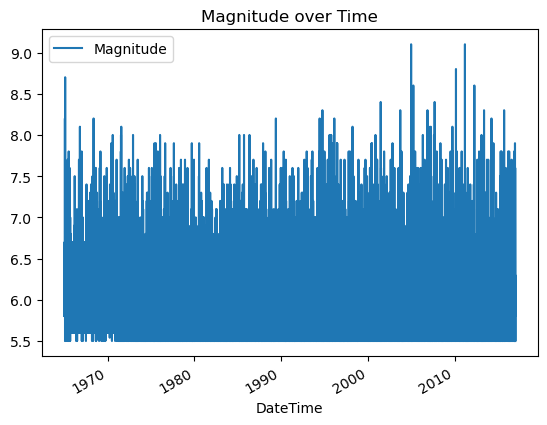

In [36]:
# 4. Charts
df.plot(x='DateTime', y='Magnitude', kind='line', title='Magnitude over Time')
plt.show()

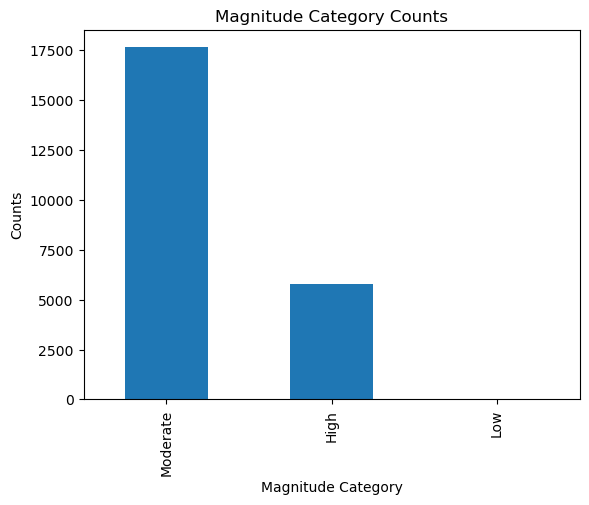

In [37]:
df['Magnitude Category'].value_counts().plot(kind='bar', title='Magnitude Category Counts')
plt.xlabel('Magnitude Category')
plt.ylabel('Counts')
plt.show()

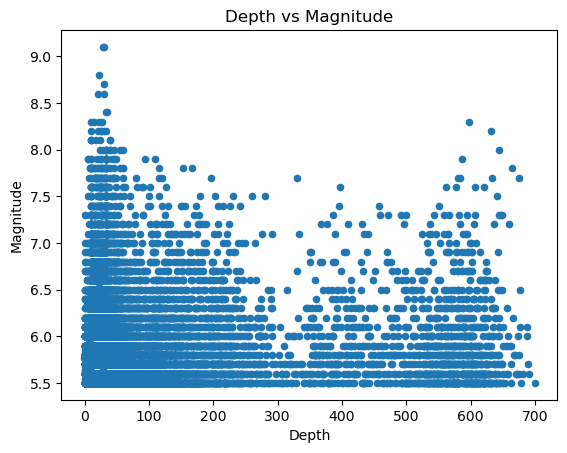

In [38]:
df.plot(x='Depth', y='Magnitude', kind='scatter', title='Depth vs Magnitude')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.show()

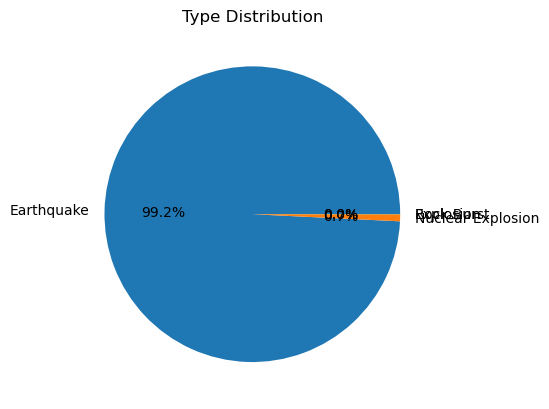

In [39]:
df['Type'].value_counts().plot(kind='pie', title='Type Distribution', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [40]:
# 5. Date transformations
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status', 'DateTime',
       'Magnitude Category'],
      dtype='object')


In [41]:
print(df.head())

   Latitude  Longitude        Type  Depth  Depth Error  \
0    19.246    145.616  Earthquake  131.6          NaN   
1     1.863    127.352  Earthquake   80.0          NaN   
2   -20.579   -173.972  Earthquake   20.0          NaN   
3   -59.076    -23.557  Earthquake   15.0          NaN   
4    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  Magnitude Error  \
0                     NaN        6.0             MW              NaN   
1                     NaN        5.8             MW              NaN   
2                     NaN        6.2             MW              NaN   
3                     NaN        5.8             MW              NaN   
4                     NaN        5.8             MW              NaN   

   Magnitude Seismic Stations  ...  Horizontal Distance  Horizontal Error  \
0                         NaN  ...                  NaN               NaN   
1                         NaN  ...                  NaN         